In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# from NewsSentiment import TargetSentimentClassifier
from scipy.signal import savgol_filter


In [ ]:
# tsc = TargetSentimentClassifier()
# tsc.infer_from_text("i hate trump", "trump")

In [13]:
cnn = pd.read_csv('../data/output_data/netanyahu_cnn_news_sentiment_not_norm.csv')
fox = pd.read_csv('../data/output_data/netanyahu_fox_news_sentiment_not_norm.csv')


In [14]:
worst_precentile = cnn.compound_s.quantile(0.1)
best_precentile = cnn.compound_s.quantile(0.9)
print("worst_precentile (10%): ", worst_precentile, ". best_precentile (10%): ", best_precentile)

best_precentile = cnn.compound_s.quantile(0.95)
print("best_precentile (5%): ", best_precentile)

cnn[cnn.compound_s < worst_precentile].loc[:, ('title', 'compound_s')].values

worst_precentile (10%):  -0.9999355623692286 . best_precentile (10%):  0.5525246255121826
best_precentile (5%):  0.9353988630391642


array([["Opinion: Mitt Romney's moments of truth", -1.0],
       ['Israel targets Gaza with airstrikes after intercepting rocket attack',
        -1.0],
       ['Jacinda Ardern, like George Washington, knew when to quit',
        -0.9999956871917902],
       ['Biden tries to ease worries over US commitment to the Middle East in meetings with key leaders',
        -0.9999979156019558],
       ['Saudi Arabia opens airspace to Israeli flights',
        -0.9999979156019558],
       ['Israeli and Palestinian leaders speak by phone for the first time in years',
        -1.0],
       ['5 things to know for June 21: Gas prices, Ukraine, January 6, Israel, Covid-19',
        -0.9999922828773666],
       ['Israel and the West Bank are on edge again. Here are five things you need to know',
        -0.9999999974859916],
       ['Israeli officials deny report that police are using cellphone spying software on citizens without court approval',
        -0.999999999999998],
       ['Israel doubles dow

In [15]:
cnn[cnn.compound_s > best_precentile].loc[:, ('title', 'compound_s')].values

array([['11 Palestinians killed during Israeli raid targeting militants in West Bank',
        0.9985939046633222],
       ["Opinion: What Europe makes of America's election result",
        0.9994010644617802],
       ['July 9, 2022 Shinzo Abe assassination news', 0.9999999602501988],
       ['July 8, 2022 Shinzo Abe shot dead in Nara, Japan',
        0.9999999602501988],
       ['Israel announces plan to double Golan Heights population, drawing condemnation from Syria',
        0.9993514270751204]], dtype=object)

### only one occurence
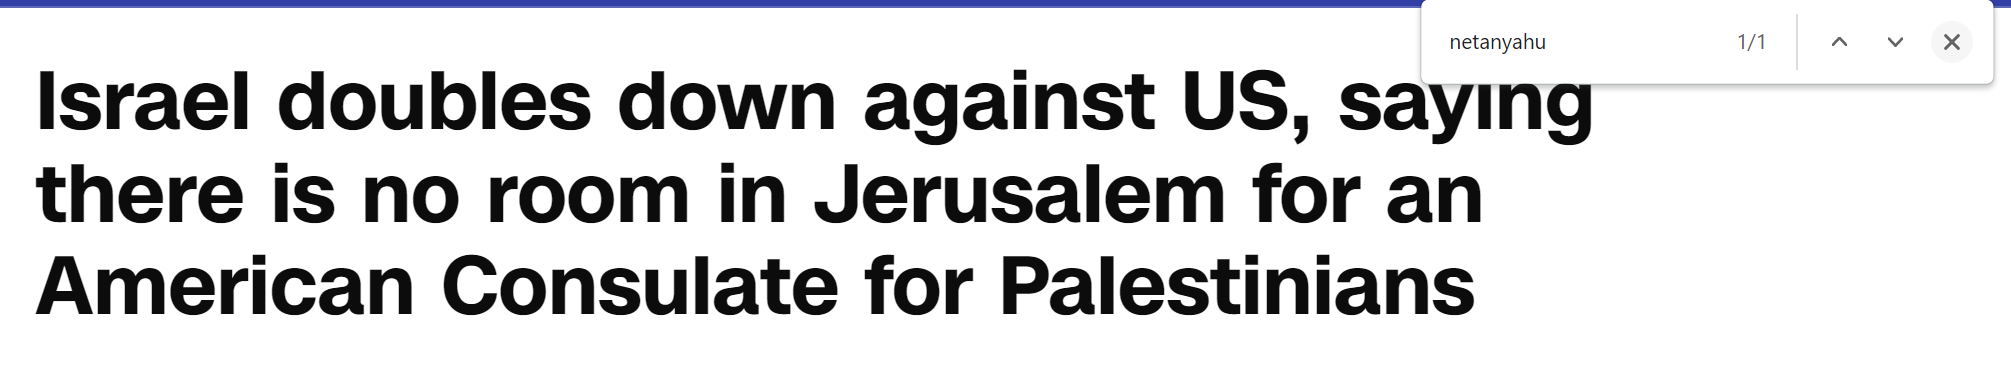

### colors the entire article as -1.0 negative (worst possible)
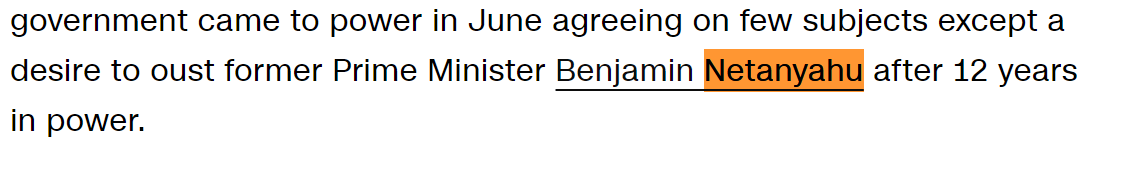

In [11]:
cnn = pd.read_csv('../data/output_data/netanyahu_cnn_news_sentiment.csv')
fox = pd.read_csv('../data/output_data/netanyahu_fox_news_sentiment.csv')


In [12]:
worst_precentile = cnn.compound_s.quantile(0.1)
best_precentile = cnn.compound_s.quantile(0.9)
print("worst_precentile (10%): ", worst_precentile, ". best_precentile (10%): ", best_precentile)

best_precentile = cnn.compound_s.quantile(0.95)
print("best_precentile (5%): ", best_precentile)

cnn[cnn.compound_s < worst_precentile].loc[:, ('title', 'compound_s')].values

worst_precentile (10%):  -0.8133121959478349 . best_precentile (10%):  0.5290328383681612
best_precentile (5%):  0.6911645036729865


array([['Israel targets Gaza with airstrikes after intercepting rocket attack',
        -1.0],
       ['A major oil exporter is hosting a UN climate summit. Opinions are divided',
        -0.8999349635766452],
       ['More than 80,000 people turn out for Tel Aviv protest against Netanyahu government',
        -0.9540841074848612],
       ['The world leaders who refuse to leave the stage',
        -0.9444444444444444],
       ["Israel's Prime Minister makes rare allusion to country's nuclear weapons arsenal",
        -0.9999999990541312],
       ['Saudi Arabia opens airspace to Israeli flights',
        -0.9444424758462916],
       ['Israeli and Palestinian leaders speak by phone for the first time in years',
        -1.0],
       ['A leader for all Israelis? Yair Lapid takes over as caretaker prime minister',
        -0.8917801697616614],
       ['Netanyahu negotiating possible corruption case plea deal to safeguard political career, sources say',
        -0.8638911902475801],
       

### Now it's way more clear
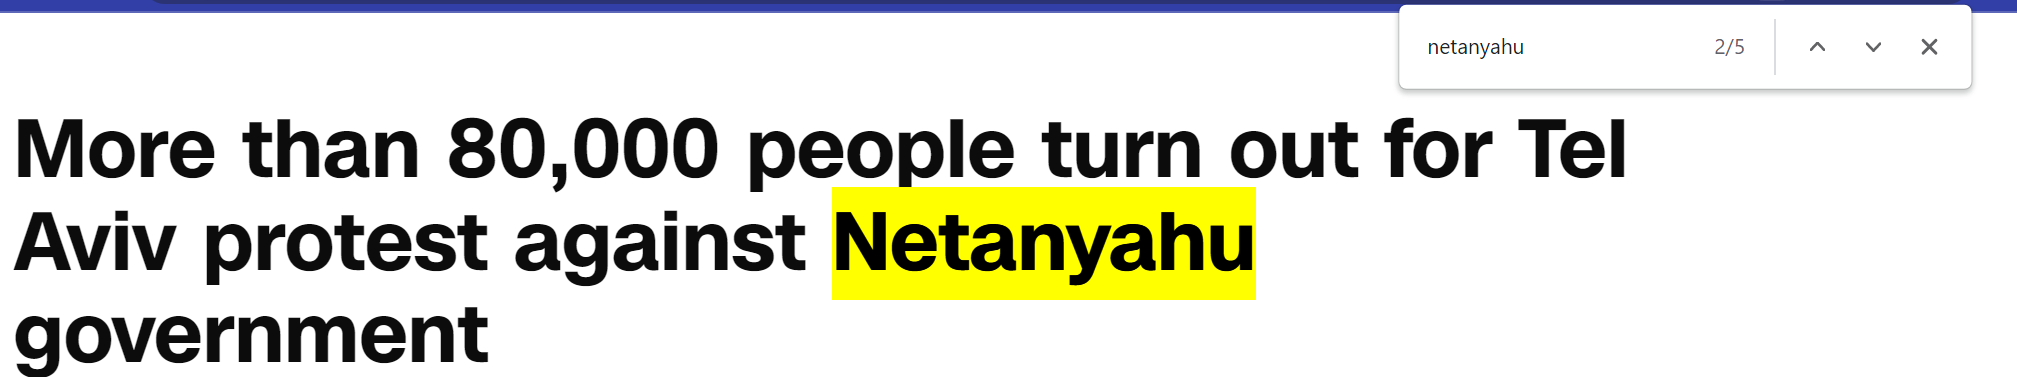

...

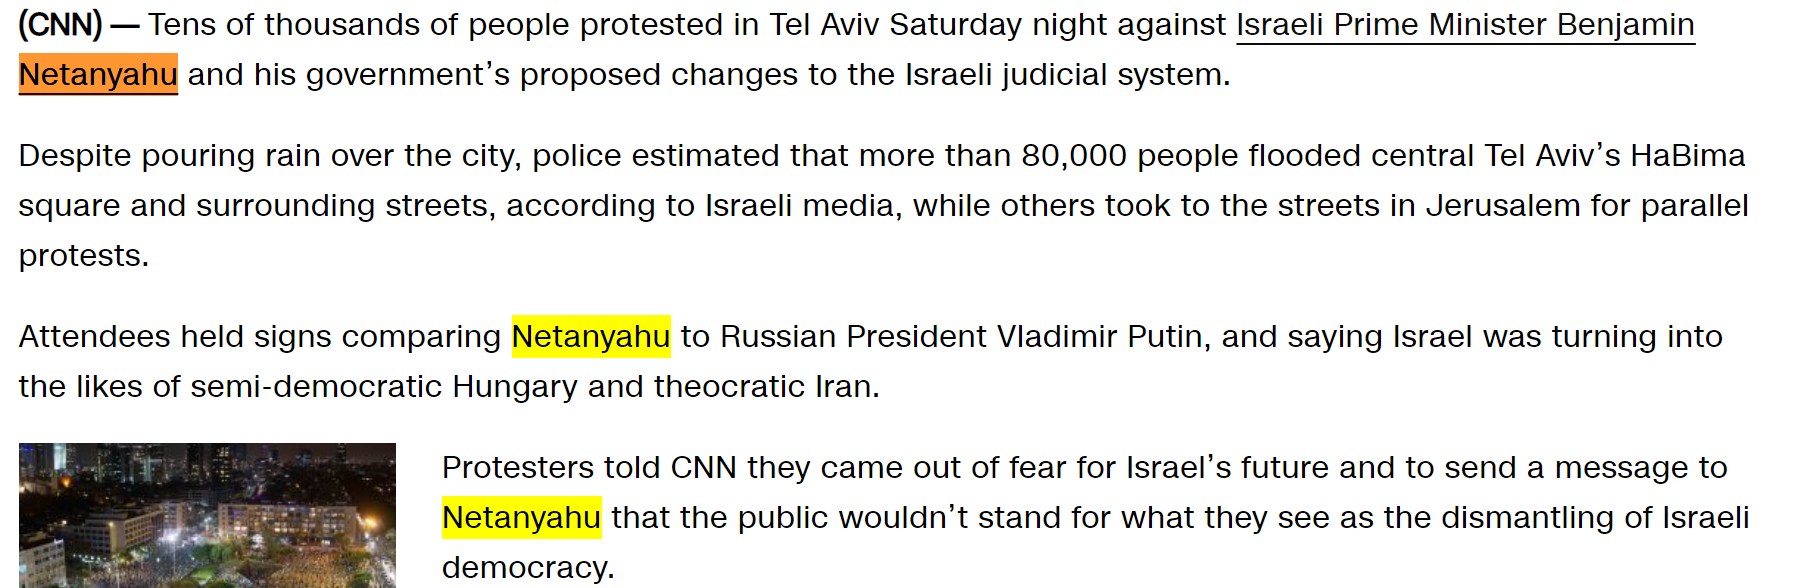

In [ ]:
def add_label(row):
    labels = {row['neg_s']: 'Negative', row['pos_s']:'Positive', row['neu_s']:'Neutral'}
    max_val = max(labels.keys())
    row['label'] = labels[max_val]
    row[labels[max_val]] = 1
    labels.pop(max_val)
    for key in labels.keys():
        row[labels[key]] = 0
    return row

cnn = cnn.apply(add_label, axis=1)
fox = fox.apply(add_label, axis=1)

    
    

In [ ]:
def date_from_recet_only(df):
    df.date = [pd.to_datetime(date).strftime("%Y-%m-%d") for date in df.date]
    df = df[df['date'] > pd.to_datetime('2022-11-01')]
    df = df.sort_values(by='date')
    return df

cnn = date_from_recet_only(cnn)
fox = date_from_recet_only(fox)

In [ ]:
def plot(df:pd.DataFrame, vendor, color='#4287f5'):
    df = df.sort_values(by=['date'])
    axes = df.plot(x='date', y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8), color=color)


def joined_plot(df1:pd.DataFrame, df2:pd.DataFrame, vendor1, vendor2, color1='#4287f5', color2='#f56342'):    
    df1 = df1.sort_values(by=['date']).rename(columns={'compound_s': vendor1})
    df2 = df2.sort_values(by=['date']).rename(columns={'compound_s': vendor2})
    
    axes = df1.plot(x='date', y=vendor1, kind='line', title=f'{vendor1} and {vendor2} News Sentiment', color=color1 , figsize=(17,8))
    df2.plot(x='date', y=vendor2, kind='line', ax=axes, color=color2)
    df3 = pd.DataFrame({'date': df1.date, 'baseline': [0.0]*len(df1)}).plot(x='date', y='baseline', kind='line', ax=axes, color='#40464f', linestyle='--')

plot(cnn, 'CNN')
plot(fox, 'Fox', color='#f56342')
joined_plot(cnn, fox, 'CNN', 'Fox')

In [ ]:
def weekly_avg_plot(df:pd.DataFrame, vendor):
    
    df['date'] = pd.to_datetime(df['date'])
    df['week'] = df['date'].dt.week.astype(str) + '-' + df['date'].dt.year.astype(str)
    df = df.sort_values(by=['week'], ascending=False)
    df.groupby('week').median().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

def monthly_avg_plot(df:pd.DataFrame, vendor):
        
        df['date'] = pd.to_datetime(df['date'])
        df['month'] = df['date'].dt.month.astype(str) + '-' + df['date'].dt.year.astype(str)
        df = df.sort_values(by=['month'], ascending=False)
        df.groupby('month').median().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

weekly_avg_plot(cnn, 'CNN')
weekly_avg_plot(fox, 'Fox')
monthly_avg_plot(fox, 'Fox')
monthly_avg_plot(cnn, 'CNN')

In [ ]:
def plot_smooth(df:pd.DataFrame, vendor):
    df = df.sort_values(by=['date'])
    df['compound_s'] = savgol_filter(df['compound_s'], 11, 3)
    axes = df.plot(x='date', y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

plot_smooth(cnn, 'CNN')
plot_smooth(fox, 'Fox')

In [ ]:
cnn = pd.read_csv('netanyahu_cnn_news_sentiment_lbl.csv')

In [ ]:
def add_month(row):
    row['month'] = row['date'].split('-')[0] + '-' + row['date'].split('-')[1]
    return row

# cnn = cnn.apply(add_month, axis=1)

def plot_counts(df:pd.DataFrame, vendor):

    df = df.apply(add_month, axis=1)
    df = df.sort_values(by=['month'])
    df.groupby('month').agg({'pos':'sum', 'neg':'sum', 'neu':'sum'}).plot(kind='bar', title=f'{vendor} News Sentiment', figsize=(17,8))

plot_counts(cnn, 'CNN')
# cnn

In [ ]:
fox[cnn.month == '2021-12']